In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


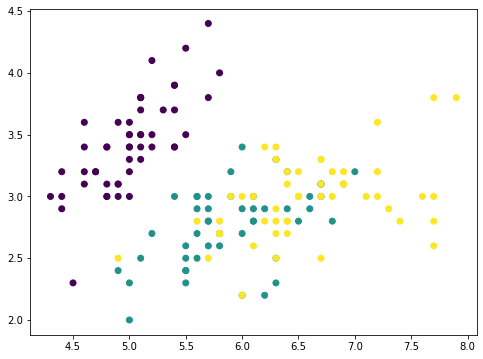

In [5]:
iris = load_iris()

X = iris.data
y = iris.target

#Voir la taille des données
print(X.shape)

plt.figure(figsize=(8, 6))
# Deux 1eres données en fonction de leur classes
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1)
plt.show()

**Cette technique de Cross Validation consiste à entrainer puis valider le modèle sur plusieurs découpes possibles du Train Set. Noter que l'on va uniquement travailler sur cette découpe car, le test set est reservé uniquement pour l'évaluation finale du modèle.**

# Stratégie de KFold
**Elle consiste à melanger les données du train set ensuite les découper en 4 splits egaux puis entrainer le modèle sur les 3 1ers splits ensuite, alterner avec les différentes possibilités.**
### NB : *Elle est très bonne pour la régression*

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut, ShuffleSplit

In [11]:
# Nbre de split et le melangeur de données (shuffle)
cv = KFold(5, shuffle=True)

score_val = cross_val_score(KNeighborsClassifier(), X, y, cv=cv)
score_val

array([1.        , 0.93333333, 0.96666667, 0.93333333, 0.93333333])

In [13]:
'''
On peut entrainer le modèle sur toutes les données train que l'on dispose ensuite l'évaluer
sur chaque catégorie de données, mais attention car, cela consomme une grande quantité de données
et si jamais votre Dateset contient des milliers de données, cela poserait problème
'''
cv1 = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv=cv1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Shuffle Split
**Avec cette technique, il va falloir découper les données se fait selon une classe 0 dans laquelle au moins un élt de cette classe sera affecté au découpe**

In [16]:
# Découper les données de train en 5 splits et préciser le pourcentage de test ou de train
cv = ShuffleSplit(5, test_size=0.2)
val = cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

# Stratified KFold
**Dansa la technique précedente il se pourrait que l'on ai aucun élt de la classe 0 dans chaque découpe et dans ce cas le modèle ne sera pas optimisé, d'où l'utilisation de la technique présente.** *Nous aurons alors, le choix par défaut*

In [17]:
from sklearn.model_selection import StratifiedKFold

In [20]:
# On précise le nbre de découpe que l'on veut avoir, ici 5
cv = StratifiedKFold(5)
val_strat = cross_val_score(KNeighborsClassifier(), X, y, cv=cv)
val_strat

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

# Group KFold
***Son utilisation est très utile dans le cas où vous avez des données qui dépendent d'un certain groupe***

In [27]:
from sklearn.model_selection import GroupKFold
import seaborn as sns

In [30]:
# Cette fois-ci on travaille sur les données de titanic
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
# Ne sélectionner qu'une partie de colonnes qui nous est utile
titanic = titanic[["survived", "pclass", "sex", "age"]]
titanic.head()

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [40]:
# les features
titanic_data = titanic[["pclass", "sex", "age"]]
titanic_target = titanic.drop(["pclass", "sex", "age"], axis=1)

In [42]:
# Par défaut, le nbre de splits est fixé à 5
cv = GroupKFold().get_n_splits(titanic_data, titanic_target, groups=titanic["pclass"])
cross_val_score(KNeighborsClassifier(), X, y, cv=cv)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])